In [2]:
# data_home = '/home/ivan/datasets/'

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
# from tensorflow import keras
from matplotlib import patches
from tqdm import tqdm
import PIL
from PIL import Image
import sys
# sys.path.append('../blood_codes/')
# import image_utils

In [5]:
cropped_data_mars = '/data/datasets/mars_images/scrapped_cropped_256_augmentated//'
cropped_data_earth = '/data/datasets/earth_images/proc_cropped_256_augmentated//'
cropped_data_ocean = '/data/datasets/earth_images/proc_sea_cropped_256_augmentated/'
input_folders = {'mars': cropped_data_mars, 'earth': cropped_data_earth, 'ocean': cropped_data_ocean}

In [6]:
for k, v in input_folders.items():
    print(f'{k}\t{len(os.listdir(v))}')

mars	1211700
earth	540204
ocean	282652


mars	1211700


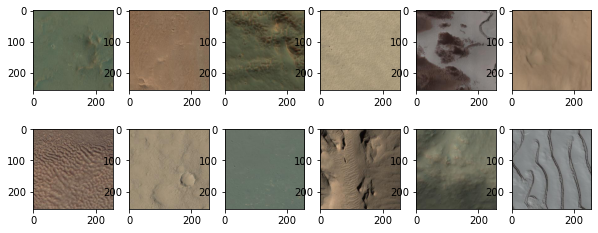

earth	540204


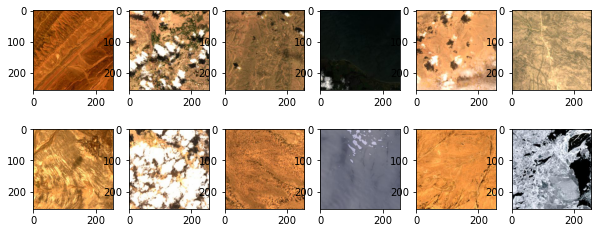

ocean	282652


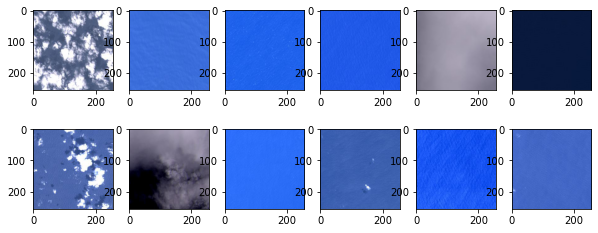

In [7]:
n_ims = 12
for k, v in input_folders.items():
    print(f'{k}\t{len(os.listdir(v))}')
    
    plt.figure(figsize=(10,4))
    files = np.random.choice(os.listdir(v), n_ims, replace=False)
    for i, f in enumerate(files):
        plt.subplot(2,int(n_ims/2),i+1)
        plt.imshow(plt.imread(f'{v}/{f}'))
    plt.show()
    

### Generate random samples

In [8]:
total_images = np.sum([len(os.listdir(v)) for k, v in input_folders.items()])

for k, v in input_folders.items():
    print(f'{k}\t{len(os.listdir(v))}')
    print(f'{k}\t{len(os.listdir(v)) / total_images}')

mars	1211700
mars	0.5955599157752355
earth	540204
earth	0.2655144414801067
ocean	282652
ocean	0.1389256427446578


In [9]:
fracs = {
    'mars': 0.51,
    'earth': 0.41, # some of this include sea and costilne
    'ocean': 0.08}

print(np.sum([v for _, v in fracs.items()]))


desired_total_images = 1000000
print(desired_total_images/total_images)
sampling_values = {k: int(desired_total_images * v ) for k, v in fracs.items()}
sampling_values

0.9999999999999999
0.4915077294505533


{'mars': 510000, 'earth': 410000, 'ocean': 80000}

In [10]:
sampled_files = {}
for k, v in sampling_values.items():
    folder = input_folders[k]
    files = np.random.choice(os.listdir(folder), v, replace=False)
    files_full_path = [f'{folder}/{f}' for f in files ]
    sampled_files[k] = files_full_path
    print(k, len(files_full_path))
    print(files_full_path[0])
    print('_________')

mars 510000
/data/datasets/mars_images/scrapped_cropped_256_augmentated///ESP_018605_2680_RGB.NOMAP.browse_55_4.jpg
_________
earth 410000
/data/datasets/earth_images/proc_cropped_256_augmentated///cropped_LC08_207002_20180709_30_2.jpg
_________
ocean 80000
/data/datasets/earth_images/proc_sea_cropped_256_augmentated//cropped_LC08_209048_20181214_65_1.jpg
_________


In [11]:
all_files = np.concatenate([v for v in sampled_files.values()])
len(all_files)

1000000

## scp files to dest folder

In [12]:
import shutil

In [15]:
input_folders

{'mars': '/data/datasets/mars_images/scrapped_cropped_256_augmentated//',
 'earth': '/data/datasets/earth_images/proc_cropped_256_augmentated//',
 'ocean': '/data/datasets/earth_images/proc_sea_cropped_256_augmentated/'}

In [14]:
dest_folder = '/data/datasets/earth_mars_images_256_all_aug/'

sampled_files = {}
for k, v in sampling_values.items():
    folder = input_folders[k]
    files = np.random.choice(os.listdir(folder), v, replace=False)
    files_full_path = [f'{folder}/{f}' for f in files ]
    sampled_files[k] = files_full_path
    print(k, len(files_full_path))
    print(files_full_path[0])
    for ff in tqdm(files):
#         os.system(f'scp {os.path.join(folder,ff)} {dest_folder}')
        shutil.copy2(os.path.join(folder,ff), dest_folder)
    print('_________')

  0%|          | 0/510000 [00:00<?, ?it/s]

mars 510000
/data/datasets/mars_images/scrapped_cropped_256_augmentated///ESP_054390_2515_RGB.NOMAP.browse_41_2.jpg


 10%|█         | 51486/510000 [06:30<51:07, 149.49it/s]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 36%|███▋      | 185149/510000 [23:26<36:47, 147.14it/s]  IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

 63%|██████▎   | 323423/510000 [41:32<30:27, 102.07it/s] IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`

## Check image extensions

In [45]:
import os
from PIL import Image
folder_path = dest_folder
invalids = []
for filee in tqdm(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filee)
    splitted = filee.split('.')
    if len(splitted)>2:
        new_name = '{}.{}'.format(('_').join(splitted[:-1]), splitted[-1])
        new_file_path = os.path.join(folder_path, new_name)
        shutil.move(file_path, new_file_path)

100%|██████████| 998705/998705 [19:47<00:00, 841.28it/s] 


In [47]:
import os
from PIL import Image
folder_path = dest_folder
invalids = []
for filee in tqdm(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filee)
    splitted = filee.split('.')
    if len(splitted)>2:
        new_name = '{}.{}'.format(('_').join(splitted[:-1]), splitted[-1])
        new_file_path = os.path.join(folder_path, new_name)
        print(file_path)
        print(new_file_path)
        print('_________')

100%|██████████| 998705/998705 [00:01<00:00, 807637.95it/s]


In [50]:
import os
from PIL import Image
folder_path = dest_folder
invalids = []
for filee in tqdm(os.listdir(folder_path)):
    file_path = os.path.join(folder_path, filee)
    PIL.Image.open(file_path)

## Generate dataset for pytorch

In [90]:
from typing import Callable, Optional, Tuple, Union
from pathlib import Path
import io

In [91]:
def file_ext(name: Union[str, Path]) -> str:
    return str(name).split('.')[-1]

# def folder_write_bytes(fname: str, data: Union[bytes, str]):
#     os.makedirs(os.path.dirname(fname), exist_ok=True)
#     with open(fname, 'wb') as fout:
#         if isinstance(data, str):
#             data = data.encode('utf8')
#         fout.write(data)

def open_dest(dest: str) -> Tuple[str, Callable[[str, Union[bytes, str]], None], Callable[[], None]]:
    dest_ext = file_ext(dest)

    if dest_ext == 'zip':
        if os.path.dirname(dest) != '':
            os.makedirs(os.path.dirname(dest), exist_ok=True)
        zf = zipfile.ZipFile(file=dest, mode='w', compression=zipfile.ZIP_STORED)
        def zip_write_bytes(fname: str, data: Union[bytes, str]):
            zf.writestr(fname, data)
        return '', zip_write_bytes, zf.close
    else:
        # If the output folder already exists, check that is is
        # empty.
        #
        # Note: creating the output directory is not strictly
        # necessary as folder_write_bytes() also mkdirs, but it's better
        # to give an error message earlier in case the dest folder
        # somehow cannot be created.
        if os.path.isdir(dest) and len(os.listdir(dest)) != 0:
            error('--dest folder must be empty')
        os.makedirs(dest, exist_ok=True)

        def folder_write_bytes(fname: str, data: Union[bytes, str]):
            os.makedirs(os.path.dirname(fname), exist_ok=True)
            with open(fname, 'wb') as fout:
                if isinstance(data, str):
                    data = data.encode('utf8')
                fout.write(data)
        return dest, folder_write_bytes, lambda: None



In [92]:
#########
dest = '/data/datasets/earth_mars_images_256'
max_samples = desired_total_images
# max_samples = 5000
# pbar = tqdm(total=max_samples) # Initialise
counter = 0
#########


archive_root_dir, save_bytes, close_dest = open_dest(dest)
for fname in tqdm(all_files):
    if counter >= max_samples:
        break
    label = None
    img = np.array(PIL.Image.open(fname))
    idx = counter
    idx_str = f'{idx:08d}'
    archive_fname = f'{idx_str[:5]}/img{idx_str}.png'
    resolution = img.shape[0]
    channels = img.shape[2] if img.ndim == 3 else 1
    cur_image_attrs = {
                'width': img.shape[1],
                'height': img.shape[0],
                'channels': channels
            }      

    dataset_attrs = cur_image_attrs
    width = dataset_attrs['width']
    height = dataset_attrs['height']
    if width != height:
        error(f'Image dimensions after scale and crop are required to be square.  Got {width}x{height}')
    if dataset_attrs['channels'] not in [1, 3]:
        error('Input images must be stored as RGB or grayscale')
    if width != 2 ** int(np.floor(np.log2(width))):
        error('Image width/height after scale and crop are required to be power-of-two')

    # # save images
    img_pil = PIL.Image.fromarray(img.astype('uint8'), { 1: 'L', 3: 'RGB' }[channels])
    image_bits = io.BytesIO()
    img_pil.save(image_bits, format='png', compress_level=0, optimize=False)
    save_bytes(os.path.join(archive_root_dir, archive_fname), image_bits.getbuffer())
    # labels.append([archive_fname, image['label']] if image['label'] is not None else None)
    counter += 1
close_dest()        
pbar.close()




100%|██████████| 30000/30000 [05:56<00:00, 84.04it/s] 
